# Imports

In [1]:
# General imports
import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

# Other imports
import multiprocessing
import parmap
import collections
from tqdm import tqdm
tqdm.pandas()
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=60, progress_bar=True)
from pprint import pprint

# Figures imports
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statannot import add_stat_annotation
import matplotlib.font_manager as font_manager

# Font settings
font_dirs = ['/home/weber/Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'

# Custom utils
sys.path.append("/home/weber/PycharmProjects/EXOTIC/src")
from utils.utils import load_config_file

## YAML FILES CONFIG
yaml = load_config_file(config_file="/home/weber/PycharmProjects/EXOTIC/src/config.yaml")
exotic_files = yaml

/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


INFO: Pandarallel will run on 60 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/weber/.conda/envs/ExoCarto/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


# Figures

## Suppl - EXOTIC-up exons distribution 

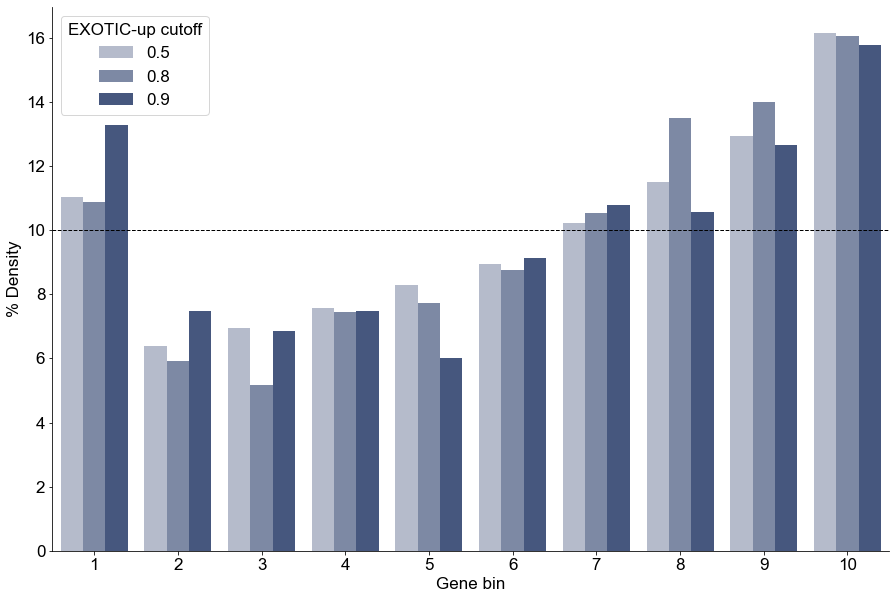

In [6]:
# TODO : import corresponding excel file

nb_bin = 10
min_max='up'
exotic_cutoffs = [0.5, 0.8, 0.9]

concat_df_distribution = pd.read_excel("/gstock/EXOTIC/data/EXOTIC/EXOTIC_{}_density_exons_{}_bins.xlsx".format(min_max, str(nb_bin)))
concat_df_distribution.columns = ['EXOTIC_cutoff', 'Type'] + [str(e) for e in range(1, nb_bin+1,1)]
concat_df_distribution['EXOTIC_cutoff'] = [sub_e for e in exotic_cutoffs for sub_e in [e]*2]

concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['Type'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='EXOTIC_cutoff', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
concat_df_distribution_ratios.head()

palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='EXOTIC_cutoff', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='EXOTIC-up cutoff')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Suppl - EXOTIC-down exons distribution 

   level_0 variable      value
0      0.5        1  11.015834
1      0.8        1  10.642827
2      0.9        1  12.146597
3      0.5        2   6.377378
4      0.8        2   4.640272


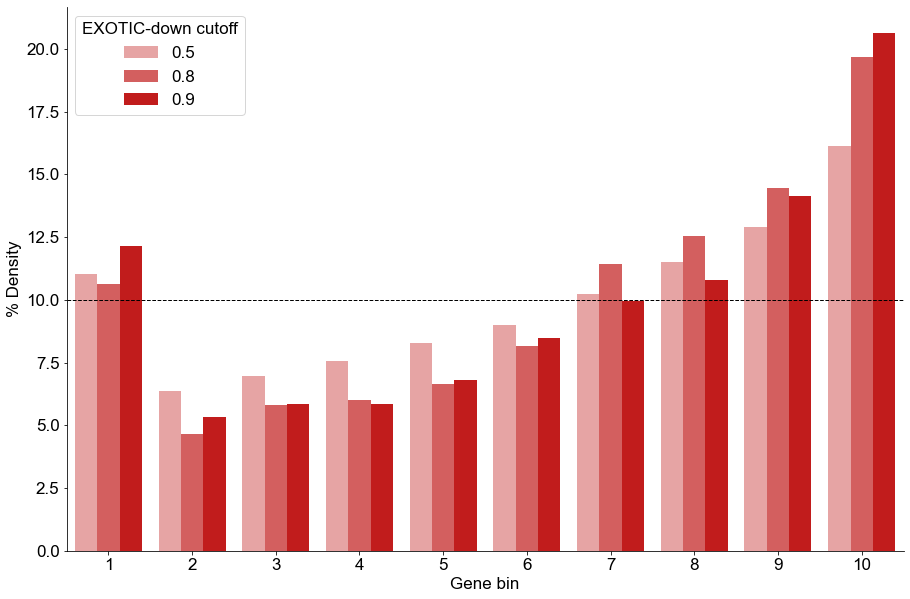

In [203]:
# TODO : import corresponding excel file

concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
print(concat_df_distribution_ratios.head())

palette = ['#f19999', '#e64c4c', '#dc0000',]
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='level_0', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='EXOTIC-{} cutoff'.format(min_max))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Suppl - All sQTL distribution

   index variable      value
0  Ratio        1   8.728557
1  Ratio        2   9.399184
2  Ratio        3   9.631250
3  Ratio        4  10.063179
4  Ratio        5  10.188211
5  Ratio        6  10.240308
6  Ratio        7  10.346395
7  Ratio        8  10.380495
8  Ratio        9  10.172108
9  Ratio       10  10.850312


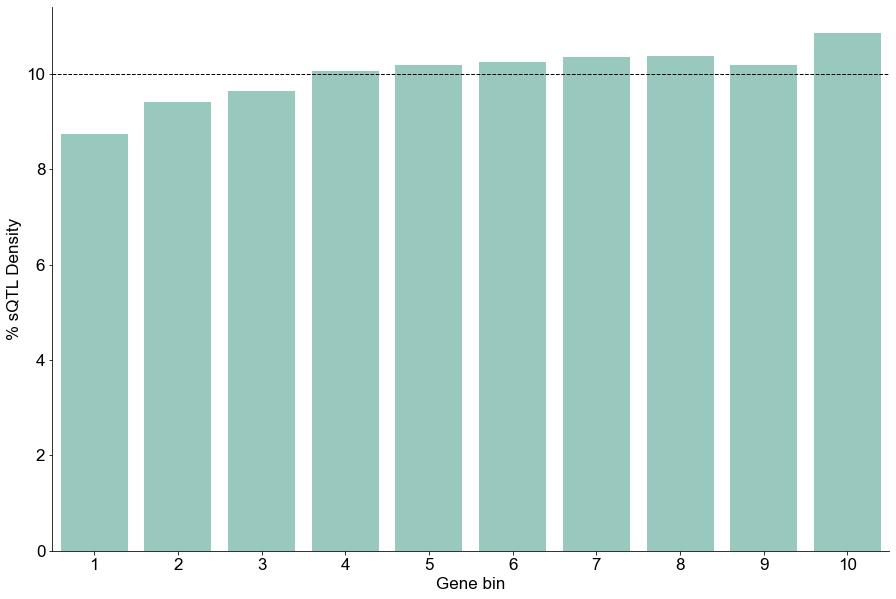

In [245]:
# TODO : import excel distribution file

tmp_d = {k:v for k,v in dict(collections.Counter([",".join([str(sub_e) for sub_e in e ]) for e in sqtl_deduplicated[['snpId', 'snpId_bin']].drop_duplicates(subset=['snpId']).snpId_bin.values.tolist()])).items() if v > 10}
tmp_d = [[v if int(e) == 1 else 0 for e in k.split(',')] for k,v in tmp_d.items()]
tmp_df = pd.DataFrame(tmp_d)
tmp_df.loc['Total'] = tmp_df.sum(axis=0)
tmp_df.loc['Ratio'] = 100 * (tmp_df.loc['Total'] / tmp_df.loc['Total'].sum())
tmp_df.columns = [str(e) for e in range(1,nb_bin +1 ,1)]
concat_df_distribution = tmp_df.tail(2)
tmp_df

concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['index'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='index', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
concat_df_distribution_ratios.head()

print(concat_df_distribution_ratios)

palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='index', palette=['#91D1C2'])
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend().remove()
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Suppl Figure - EXsQTL (eg. sQTL matching EXOTIC-up tissue)

100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


    level_0 variable      value
0       0.5        1   9.365725
1       0.8        1   9.194030
2       0.9        1   8.707124
3       0.5        2   9.684511
4       0.8        2   7.701493
5       0.9        2   6.860158
6       0.5        3   9.338243
7       0.8        3   7.761194
8       0.9        3   5.277045
9       0.5        4  10.470485
10      0.8        4   9.910448
11      0.9        4   7.387863
12      0.5        5   9.690008
13      0.8        5   9.970149
14      0.9        5   8.179420
15      0.5        6   9.673519
16      0.8        6  10.626866
17      0.9        6  13.456464
18      0.5        7  10.481477
19      0.8        7  10.686567
20      0.9        7  12.664908
21      0.5        8  11.064087
22      0.8        8  12.119403
23      0.9        8  12.137203
24      0.5        9   9.794438
25      0.8        9  10.686567
26      0.9        9  10.554090
27      0.5       10  10.437507
28      0.8       10  11.343284
29      0.9       10  14.775726


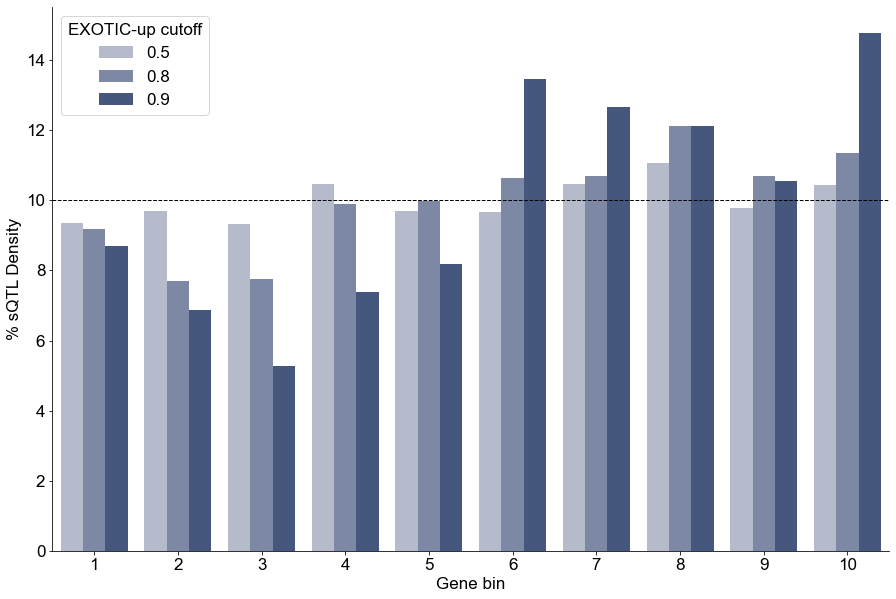

In [318]:
tmp_l = list()

exotic_cutoffs = [0.5, 0.8, 0.9]

min_max = 'up'

for exotic_cutoff in tqdm(exotic_cutoffs):
    sqtl_deduplicated_up = sqtl_deduplicated.loc[sqtl_deduplicated['EXOTIC_up'] > exotic_cutoff].explode('EXOTIC_tissues_up')
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] == sqtl_deduplicated_up['EXOTIC_tissues_up'], 'Match_tissue'] = True
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] != sqtl_deduplicated_up['EXOTIC_tissues_up'], 'Match_tissue'] = False
    sqtl_deduplicated_up.head()

    tmp_d = {k:v for k,v in dict(collections.Counter([",".join([str(sub_e) for sub_e in e ]) for e in sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Match_tissue'] == True][['snpId', 'snpId_bin']].drop_duplicates(subset=['snpId']).snpId_bin.values.tolist()])).items() if v > 10}
    tmp_d = [[v if int(e) == 1 else 0 for e in k.split(',')] for k,v in tmp_d.items()]
    tmp_df = pd.DataFrame(tmp_d)
    tmp_df.loc['Total'] = tmp_df.sum(axis=0)
    tmp_df.loc['Ratio'] = 100 * (tmp_df.loc['Total'] / tmp_df.loc['Total'].sum())
    tmp_df.columns = [str(e) for e in range(1,nb_bin +1 ,1)]
    tmp_l.append(tmp_df.tail(2))

concat_df_distribution =  pd.concat(tmp_l, keys=exotic_cutoffs, axis=0)
concat_df_distribution.to_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_{}_matching_tissue_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
concat_df_distribution_ratios.head()

print(concat_df_distribution_ratios)

if min_max == 'up':
    palette = ['#b1bacf', '#7687ab', '#3c5488']
else:
    palette = ['#f19999', '#e64c4c', '#dc0000',]
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='level_0', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='EXOTIC-{} cutoff'.format(min_max))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Suppl Figure - EXsQTL (eg. sQTL matching EXOTIC-down tissue)

100%|██████████| 3/3 [00:09<00:00,  3.17s/it]


    level_0 variable      value
0       0.5        1   9.365725
1       0.8        1   9.194030
2       0.9        1   8.707124
3       0.5        2   9.684511
4       0.8        2   7.701493
5       0.9        2   6.860158
6       0.5        3   9.338243
7       0.8        3   7.761194
8       0.9        3   5.277045
9       0.5        4  10.470485
10      0.8        4   9.910448
11      0.9        4   7.387863
12      0.5        5   9.690008
13      0.8        5   9.970149
14      0.9        5   8.179420
15      0.5        6   9.673519
16      0.8        6  10.626866
17      0.9        6  13.456464
18      0.5        7  10.481477
19      0.8        7  10.686567
20      0.9        7  12.664908
21      0.5        8  11.064087
22      0.8        8  12.119403
23      0.9        8  12.137203
24      0.5        9   9.794438
25      0.8        9  10.686567
26      0.9        9  10.554090
27      0.5       10  10.437507
28      0.8       10  11.343284
29      0.9       10  14.775726


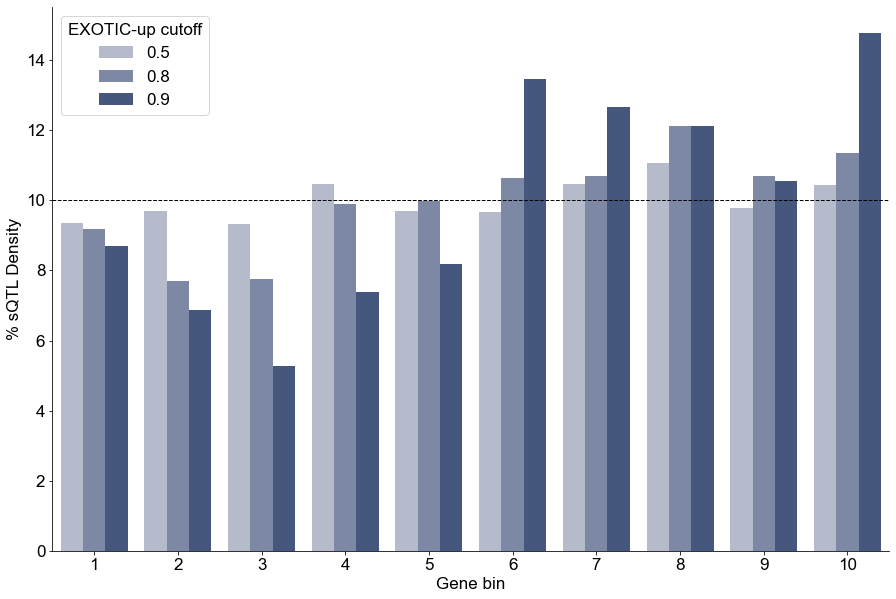

In [318]:
tmp_l = list()

exotic_cutoffs = [0.5, 0.8, 0.9]

min_max = 'up'

for exotic_cutoff in tqdm(exotic_cutoffs):
    sqtl_deduplicated_up = sqtl_deduplicated.loc[sqtl_deduplicated['EXOTIC_up'] > exotic_cutoff].explode('EXOTIC_tissues_up')
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] == sqtl_deduplicated_up['EXOTIC_tissues_up'], 'Match_tissue'] = True
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] != sqtl_deduplicated_up['EXOTIC_tissues_up'], 'Match_tissue'] = False
    sqtl_deduplicated_up.head()

    tmp_d = {k:v for k,v in dict(collections.Counter([",".join([str(sub_e) for sub_e in e ]) for e in sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Match_tissue'] == True][['snpId', 'snpId_bin']].drop_duplicates(subset=['snpId']).snpId_bin.values.tolist()])).items() if v > 10}
    tmp_d = [[v if int(e) == 1 else 0 for e in k.split(',')] for k,v in tmp_d.items()]
    tmp_df = pd.DataFrame(tmp_d)
    tmp_df.loc['Total'] = tmp_df.sum(axis=0)
    tmp_df.loc['Ratio'] = 100 * (tmp_df.loc['Total'] / tmp_df.loc['Total'].sum())
    tmp_df.columns = [str(e) for e in range(1,nb_bin +1 ,1)]
    tmp_l.append(tmp_df.tail(2))

concat_df_distribution =  pd.concat(tmp_l, keys=exotic_cutoffs, axis=0)
concat_df_distribution.to_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_{}_matching_tissue_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
concat_df_distribution_ratios.head()

print(concat_df_distribution_ratios)

palette = ['#b1bacf', '#7687ab', '#3c5488']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='level_0', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='EXOTIC-{} cutoff'.format(min_max))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


100%|██████████| 3/3 [00:10<00:00,  3.42s/it]


    level_0 variable      value
0       0.5        1   8.734013
1       0.8        1   8.330250
2       0.9        1   8.244023
3       0.5        2   9.364903
4       0.8        2   9.840917
5       0.9        2   8.615004
6       0.5        3   9.615348
7       0.8        3   9.939573
8       0.9        3  10.181369
9       0.5        4  10.031162
10      0.8        4  10.198545
11      0.9        4   9.343226
12      0.5        5  10.208959
13      0.8        5   9.742262
14      0.9        5  10.098928
15      0.5        6  10.248150
16      0.8        6   9.230485
17      0.9        6   9.604287
18      0.5        7  10.366681
19      0.8        7  10.389690
20      0.9        7  11.569112
21      0.5        8  10.373373
22      0.8        8  10.217043
23      0.9        8  10.469909
24      0.5        9  10.170723
25      0.8        9  10.488346
26      0.9        9  10.414949
27      0.5       10  10.886688
28      0.8       10  11.622888
29      0.9       10  11.459192


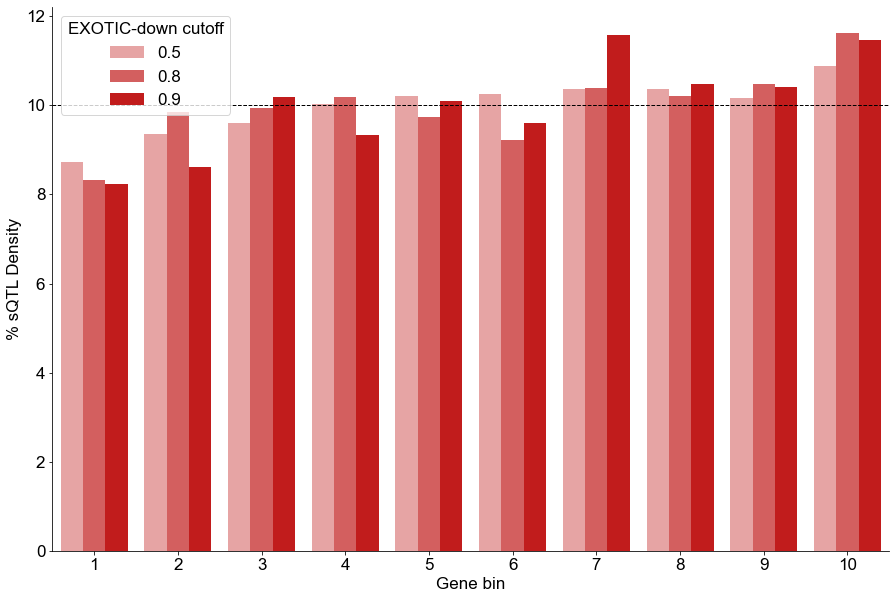

In [336]:
tmp_l = list()

min_max = 'down'

exotic_cutoffs = [0.5, 0.8, 0.9]

for exotic_cutoff in tqdm(exotic_cutoffs):
    sqtl_deduplicated_up = sqtl_deduplicated.loc[sqtl_deduplicated['EXOTIC_{}'.format(min_max)] > exotic_cutoff].explode('EXOTIC_tissues_{}'.format(min_max))
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] == sqtl_deduplicated_up['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissue'] = True
    sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Tissue'] != sqtl_deduplicated_up['EXOTIC_tissues_{}'.format(min_max)], 'Match_tissue'] = False
    sqtl_deduplicated_up.head()

    tmp_d = {k:v for k,v in dict(collections.Counter([",".join([str(sub_e) for sub_e in e ]) for e in sqtl_deduplicated_up.loc[sqtl_deduplicated_up['Match_tissue'] == False][['snpId', 'snpId_bin']].drop_duplicates(subset=['snpId']).snpId_bin.values.tolist()])).items() if v > 10}
    tmp_d = [[v if int(e) == 1 else 0 for e in k.split(',')] for k,v in tmp_d.items()]
    tmp_df = pd.DataFrame(tmp_d)
    tmp_df.loc['Total'] = tmp_df.sum(axis=0)
    tmp_df.loc['Ratio'] = 100 * (tmp_df.loc['Total'] / tmp_df.loc['Total'].sum())
    tmp_df.columns = [str(e) for e in range(1,nb_bin +1 ,1)]
    tmp_l.append(tmp_df.tail(2))

concat_df_distribution =  pd.concat(tmp_l, keys=exotic_cutoffs, axis=0)
concat_df_distribution.to_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_Not_matching_{}_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
concat_df_distribution_ratios = concat_df_distribution.reset_index()
concat_df_distribution_ratios = concat_df_distribution_ratios.loc[concat_df_distribution_ratios['level_1'] == 'Ratio']
concat_df_distribution_ratios = concat_df_distribution_ratios.melt(id_vars='level_0', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])
concat_df_distribution_ratios.head()

print(concat_df_distribution_ratios)

from colour import Color
# Color('red')
palette = ['#f19999', '#e64c4c', '#dc0000',]
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_df_distribution_ratios, x='variable', y='value', hue='level_0', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% sQTL Density')
ax.legend(title='EXOTIC-{} cutoff'.format(min_max))
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)


## Main text figure - EXOTIC-up exons, EXsQTL & Others sQTLs

Text(0.5, 1.0, 'EXOTIC-up cutoff = 0.8')

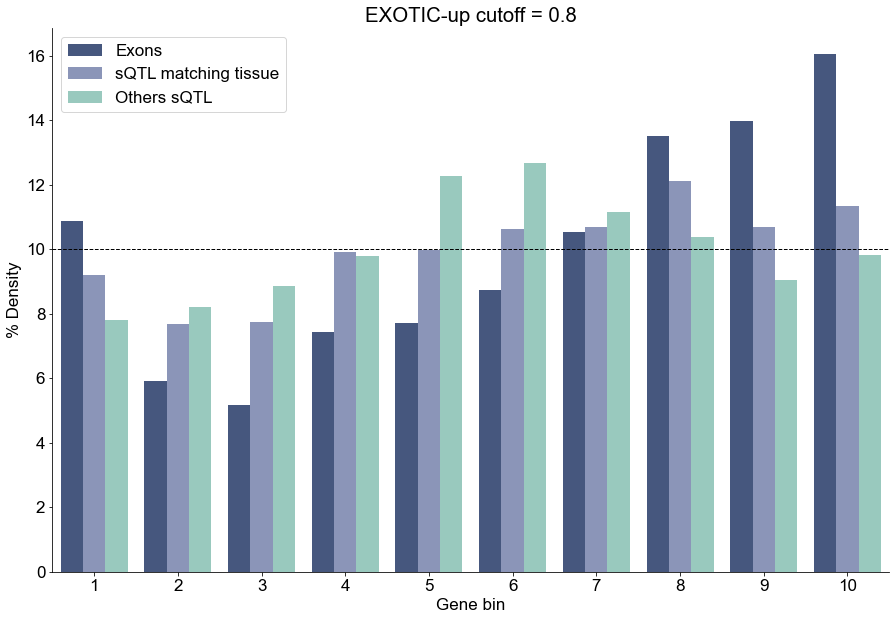

In [346]:
min_max = 'up'
nb_bin = 10
exotic_cutoff = 0.8

exons = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_{}_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
exons.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
exons['Type'] = 'Exons'
sqtl_match = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_{}_matching_tissue_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
sqtl_match.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
sqtl_match['Type'] = 'sQTL matching tissue'
sqtl_others = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_Not_matching_tissue_{}_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
sqtl_others.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
sqtl_others['Type'] = 'Others sQTL'
concat_figure = pd.concat([
    exons, 
    sqtl_match,
    sqtl_others
])
concat_figure = concat_figure.loc[concat_figure['Total/Ratio'] == 'Ratio']
concat_figure['EXOTIC_cutoff'] = [0.5,0.8,0.9] * 3
concat_figure = concat_figure.loc[concat_figure['EXOTIC_cutoff'] == exotic_cutoff]
concat_figure = concat_figure.melt(id_vars='Type', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])

palette = ['#3C5488', '#8491BF', '#91D1C2']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_figure, x='variable', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.title('EXOTIC-{} cutoff = {}'.format(min_max, str(exotic_cutoff)))

## Suppl figure - EXOTIC-down exons, EXsQTL & Others sQTLs

Text(0.5, 1.0, 'EXOTIC-down cutoff = 0.8')

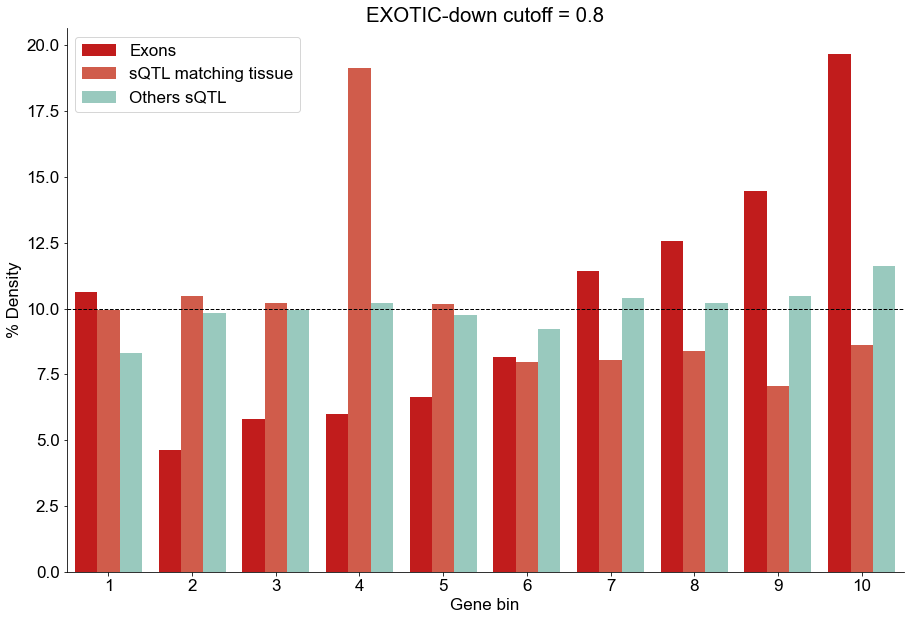

In [345]:
min_max = 'down'
nb_bin = 10
exotic_cutoff = 0.8

exons = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_{}_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
exons.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
exons['Type'] = 'Exons'
sqtl_match = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_{}_matching_tissue_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
sqtl_match.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
sqtl_match['Type'] = 'sQTL matching tissue'
sqtl_others = pd.read_excel('/gstock/EXOTIC/data/EXOTIC/sQTL_EXOTIC_Not_matching_tissue_{}_density_exons_{}_bins.xlsx'.format(min_max, str(nb_bin)))
sqtl_others.columns = ['EXOTIC_cutoff', 'Total/Ratio'] + [str(e) for e in range(1,nb_bin +1, 1)]
sqtl_others['Type'] = 'Others sQTL'
concat_figure = pd.concat([
    exons, 
    sqtl_match,
    sqtl_others
])
concat_figure = concat_figure.loc[concat_figure['Total/Ratio'] == 'Ratio']
concat_figure['EXOTIC_cutoff'] = [0.5,0.8,0.9] * 3
concat_figure = concat_figure.loc[concat_figure['EXOTIC_cutoff'] == exotic_cutoff]
concat_figure = concat_figure.melt(id_vars='Type', value_vars=[str(e) for e in range(1,nb_bin + 1,1)])

palette = ['#DC0000', '#E64B35', '#91D1C2']
plt.rcParams.update({'font.size' : 17})
f, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=concat_figure, x='variable', y='value', hue='Type', palette=palette)
plt.axhline(int(round(100 / nb_bin, 0)), lw=1, ls="--", color='black')
plt.xlabel('Gene bin')
# plt.xticklabels(pl)
plt.ylabel('% Density')
ax.legend(title='')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.title('EXOTIC-{} cutoff = {}'.format(min_max, str(exotic_cutoff)))